In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('car_eval_dataset.csv')

In [6]:
df.head()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class
0,0,vhigh,vhigh,2,2,small,low,unacc
1,1,vhigh,vhigh,2,2,small,med,unacc
2,2,vhigh,vhigh,2,2,small,high,unacc
3,3,vhigh,vhigh,2,2,med,low,unacc
4,4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
df.columns

Index(['Unnamed: 0', 'buying', 'maint', 'doors', 'persons', 'lug_boot',
       'safety', 'class'],
      dtype='object')

In [8]:
df=df.drop('Unnamed: 0',axis=1)

In [9]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [10]:
X=df.drop('class',axis=1)

In [11]:
y=df['class']

In [12]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [13]:
X=pd.get_dummies(X,drop_first=True)

In [14]:
X

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
0,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False
1,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True
2,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False
3,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False
4,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,True,False,False,True,False,False,False,False,True,False,True,True,False,False,True
1724,True,False,False,True,False,False,False,False,True,False,True,True,False,False,False
1725,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False
1726,True,False,False,True,False,False,False,False,True,False,True,False,False,False,True


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_validate_test, y_train, y_validate_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
X_validate, X_test, y_validate, y_test = train_test_split(X_validate_test, y_validate_test, test_size=0.66, random_state=101)

In [18]:
100*len(X_train)/len(X)

69.96527777777777

In [19]:
100*len(X_validate)/len(X)

10.185185185185185

In [20]:
100*len(X_test)/len(X)

19.849537037037038

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,roc_curve,auc

# Elbow Method for Choosing Reasonable K Values

In [23]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

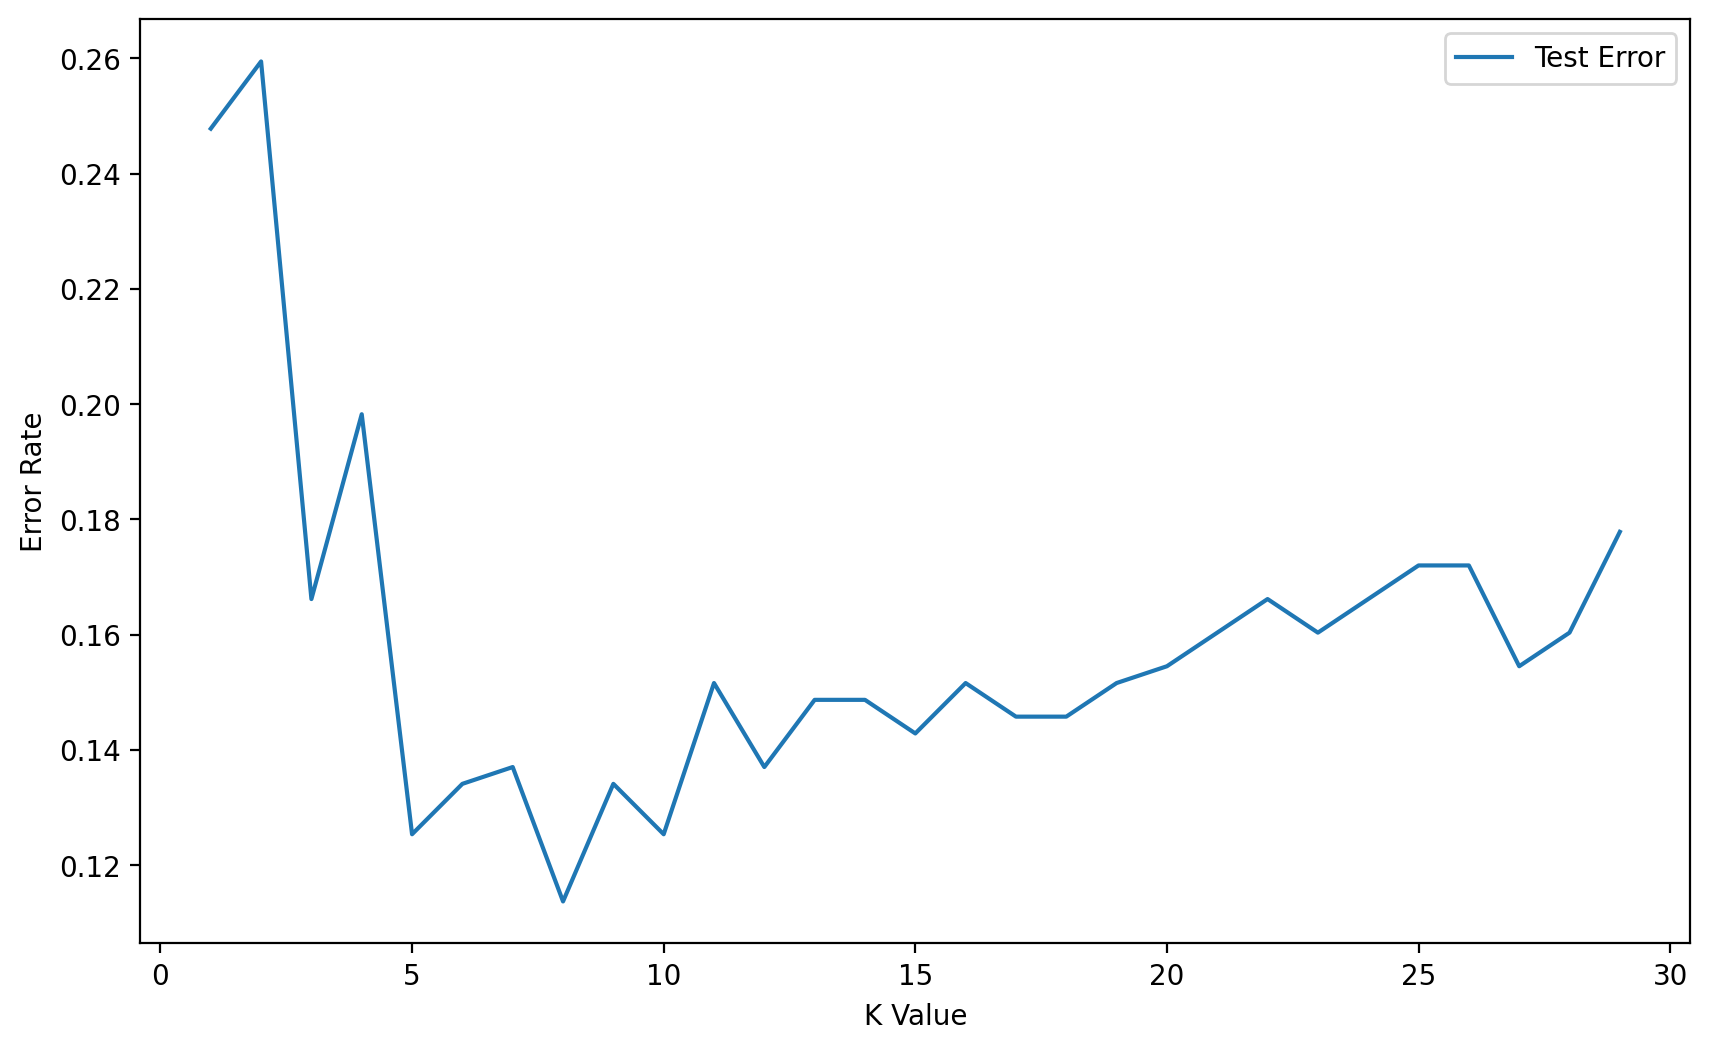

In [24]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [25]:
model=KNeighborsClassifier(n_neighbors=8)

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
scores = cross_val_score(model,X_train,y_train,scoring='accuracy',cv=10)

In [28]:
scores

array([0.83471074, 0.81818182, 0.85123967, 0.90909091, 0.81818182,
       0.80991736, 0.85123967, 0.8677686 , 0.88429752, 0.84166667])

In [29]:
np.mean(scores)

0.8486294765840221

In [30]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [31]:
y_pred=model.predict(X_validate)

In [32]:
accuracy_score(y_validate,y_pred)

0.7670454545454546

In [33]:
scores = cross_val_score(model,X_train,y_train,scoring='accuracy',cv=8)

In [34]:
scores

array([0.81578947, 0.85430464, 0.85430464, 0.83443709, 0.8013245 ,
       0.8807947 , 0.86092715, 0.86754967])

In [35]:
np.mean(scores)

0.8461789822237713

In [36]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [37]:
y_pred=model.predict(X_validate)

In [38]:
accuracy_score(y_validate,y_pred)

0.7670454545454546

In [39]:
# It is clear that with 10 folds,the accuracy is more,so we will go with 10 folds

In [40]:
model=KNeighborsClassifier(n_neighbors=8)

In [41]:
scores = cross_val_score(model,X_train,y_train,scoring='accuracy',cv=10)

In [42]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [43]:
from joblib import dump,load

In [44]:
dump(model,'knn.pkl')

['knn.pkl']

In [45]:
loaded_model=load('knn.pkl')

In [46]:
y_pred=loaded_model.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred)

0.8862973760932945

In [48]:
print(confusion_matrix(y_test,y_pred))

[[ 55   1  15   0]
 [  7   1   2   1]
 [  7   1 244   0]
 [  4   0   1   4]]


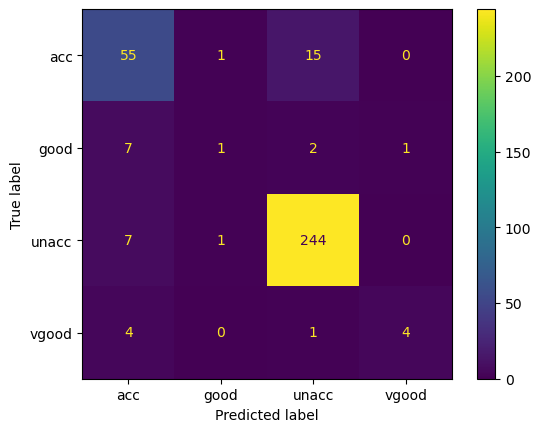

In [49]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [53]:
cm=confusion_matrix(y_test,y_pred)

In [54]:
True_Positive = np.diag(cm)
False_Positive = np.sum(cm, axis=0) - True_Positive
False_Negative = np.sum(cm, axis=1) - True_Positive
True_Negative = np.sum(cm) - (True_Positive + False_Positive + False_Negative)

In [56]:
True_Positive

array([ 55,   1, 244,   4], dtype=int64)

In [57]:
True_Negative

array([254, 330,  73, 333], dtype=int64)

In [58]:
False_Positive

array([18,  2, 18,  1], dtype=int64)

In [59]:
False_Negative

array([16, 10,  8,  5], dtype=int64)

In [60]:
sensitivity = True_Positive / (True_Positive + False_Negative)
specificity = True_Negative / (True_Negative + False_Positive)

In [61]:
sensitivity

array([0.77464789, 0.09090909, 0.96825397, 0.44444444])

In [62]:
specificity

array([0.93382353, 0.9939759 , 0.8021978 , 0.99700599])

In [65]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

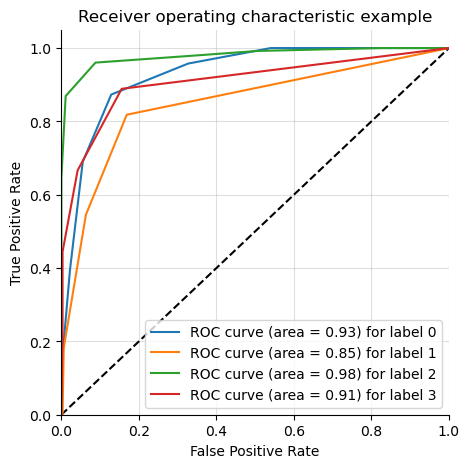

In [66]:
plot_multiclass_roc(loaded_model, X_test, y_test, n_classes=4)

In [50]:
result=pd.DataFrame({'Actual output':y_test,'Predicted Output':y_pred})

In [51]:
result

,Actual output,Predicted Output
497,unacc,unacc
552,unacc,unacc
1571,unacc,unacc
141,unacc,unacc
325,unacc,unacc
...,...,...
147,unacc,unacc
768,unacc,unacc
531,unacc,unacc
608,acc,acc


In [52]:
result.to_csv('KNN_Result.csv',index=False)